# Simple face detection using OpenVINO

### Get the libraries

In [3]:
import numpy as np
import logging as log
import sys
import bm_utils as utils
from IPython.display import HTML
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import openvino as ov

### Initialize OpenVINO

In [4]:
# Initialize OpenVINO
core = ov.Core()

available_devices=core.available_devices
print(available_devices)

['CPU', 'GPU', 'NPU']


### Get the face-detection model

In [5]:
#read a model
model = core.read_model("models/face_detection/face-detection-adas-0001.xml")

#compile the model
compiled_model = core.compile_model(model=model, device_name="CPU")

input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

### Read an image

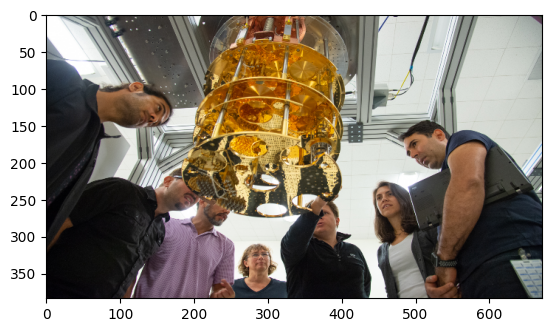

In [6]:
# Resize the image to the shape of the model's input layer
# The utils function displays the resized image before it's transposed for input into the model

image = cv2.imread("media/2.jpg")    #⏪⏪⏪⏪⏪  You can use any image in "media" folder (1.jpg, 2.jpg ...)


input_image, height, width = utils.resize_image(image, input_layer.shape)

### Run inference

In [7]:
THRESH=0.1   #⏪⏪⏪⏪⏪  You can play with the threshold (values between 0 to 1)

# Create an inference request.
boxes = compiled_model([input_image])[output_layer]

#finding the boxes with high enough score
boxes=boxes.squeeze()[:,-5:]

boxes=np.array([x[-4:] for x in boxes if x[0]>THRESH])   #take only boxes that confidence>THRESH

#scaling cordinates back to original size
boxes=boxes*np.array([width,height,width,height])
boxes=boxes.astype(np.int64)


### show results

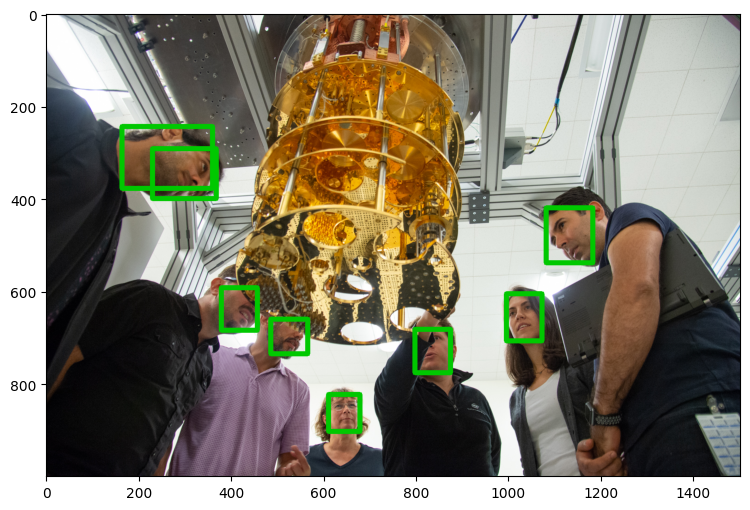

In [8]:
plt.figure(figsize=(10, 6))
final_image=utils.draw(image, boxes)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))